Temporal

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importar Librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr
import numpy as np

# Poverty Headcount Ratio
Es el porcentaje de la población que vive con menos de 3 dólares internacionales al día, ajustados por paridad de poder adquisitivo (PPP) al año 2021.

$3.00 a day → el umbral de pobreza usado.

2021 PPP → el dólar no es el dólar nominal, sino ajustado por poder adquisitivo (cuánto se puede comprar con ese dinero en cada país, tomando 2021 como año base).

% of population → te dice qué fracción de la gente en el país está por debajo de ese umbral.

In [3]:
# Debido a la diferencia entre los datasets, se deben limpiar individualmente
# Poverty headcount ratio at $3.00 a day (2021 PPP) (% of population)

# Cargar el archivo Excel
file_path = "/Datasets/API_SI.POV.DDAY_DS2_en_excel_v2_607870.xls"

df = pd.read_excel(file_path, sheet_name="Data", header=3)

# Limpiar nombres de columnas (quita espacios extra)
df.columns = df.columns.str.strip()

# Limpiar valores de texto en columnas tipo string
df["Country Name"] = df["Country Name"].str.strip()

# Filtrar Honduras
df_honduras = df[df["Country Name"] == "Honduras"]

# Eliminar columnas vacías
df_honduras = df_honduras.dropna(axis=1, how="all")

# Convertir columnas de años a numérico
for col in df_honduras.columns[4:]:
    df_honduras[col] = pd.to_numeric(df_honduras[col], errors="coerce")

# Pasar a formato largo (año - valor)
df_long = df_honduras.melt(
    id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"],
    var_name="Year",
    value_name="Value"
)

# Mantener solo filas con datos
df_long = df_long.dropna(subset=["Value"])

# Convertir Year a número
df_long["Year"] = pd.to_numeric(df_long["Year"], errors="coerce")

# Graficar
plt.figure(figsize=(10,6))
plt.plot(df_long["Year"], df_long["Value"], marker="o", linestyle="-", color="blue")

plt.title("Poverty headcount ratio at $3.00 a day (2021 PPP)\nHonduras", fontsize=14)
plt.xlabel("Año", fontsize=12)
plt.ylabel("% de la población", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)

plt.show()

plt.figure(figsize=(10,6))
plt.fill_between(df_long["Year"], df_long["Value"], color="skyblue", alpha=0.5)
plt.plot(df_long["Year"], df_long["Value"], color="blue", linewidth=2)

plt.title("Evolución de la pobreza en Honduras", fontsize=14)
plt.xlabel("Año", fontsize=12)
plt.ylabel("% de población", fontsize=12)
plt.grid(alpha=0.4)
plt.show()




FileNotFoundError: [Errno 2] No such file or directory: '/Datasets/API_SI.POV.DDAY_DS2_en_excel_v2_607870.xls'

# Número de horas extras dedicadas al día al trabajo a la semana


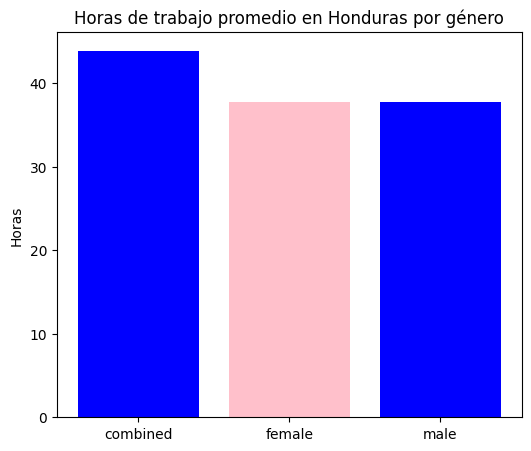

<Figure size 600x500 with 0 Axes>

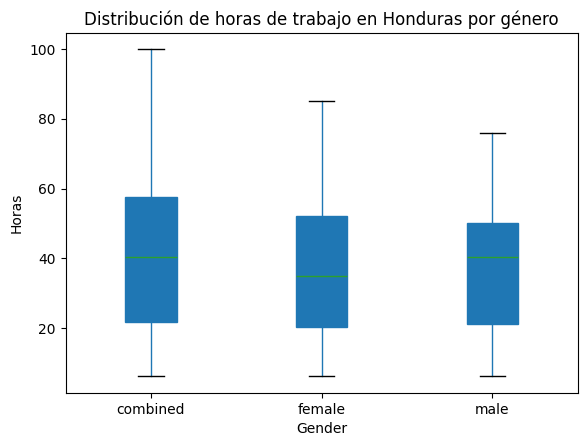

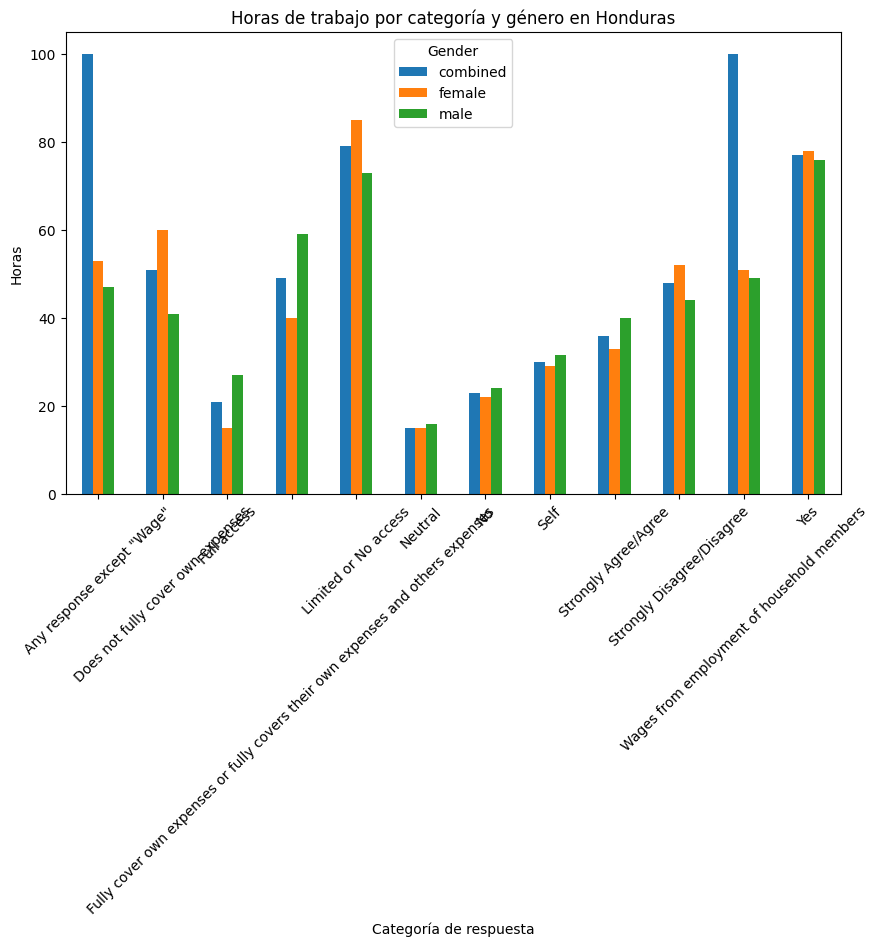

In [ ]:

# Cargar el archivo Excel
file_path = "/content/drive/MyDrive/Clases Virtuales/Carrera/Sostenibilidad/Proyecto 2/Datasets/B1.csv"

df = pd.read_csv(file_path)

# Limpiar nombres de columnas (quita espacios extra)
df.columns = df.columns.str.strip()

# Limpiar valores de texto en columnas tipo string
df["Geography"] = df["Geography"].str.strip()

# Filtrar Honduras
df_honduras = df[df["Geography"] == "Honduras"]

# Eliminar columnas vacías
df_honduras = df_honduras.dropna(axis=1, how="all")

# Normalizar datos: convertir columnas de horas a valores numéricos
df_honduras["Value"] = pd.to_numeric(df_honduras["Value"], errors="coerce")

# Agrupar por género y calcular promedio de horas
avg_hours = df_honduras.groupby("Gender")["Value"].mean().reset_index()

plt.figure(figsize=(6,5))
plt.bar(avg_hours["Gender"], avg_hours["Value"], color=["blue", "pink"])
plt.title("Horas de trabajo promedio en Honduras por género")
plt.ylabel("Horas")
plt.show()

plt.figure(figsize=(6,5))
df_honduras.boxplot(column="Value", by="Gender", grid=False, patch_artist=True)

plt.title("Distribución de horas de trabajo en Honduras por género")
plt.suptitle("")
plt.ylabel("Horas")
plt.show()

pivot = df_honduras.pivot_table(
    values="Value",
    index="Response Category",
    columns="Gender",
    aggfunc="mean"
)

pivot.plot(kind="bar", figsize=(10,6))
plt.title("Horas de trabajo por categoría y género en Honduras")
plt.ylabel("Horas")
plt.xlabel("Categoría de respuesta")
plt.xticks(rotation=45)
plt.show()


# Dataset de Ingreso por Genero

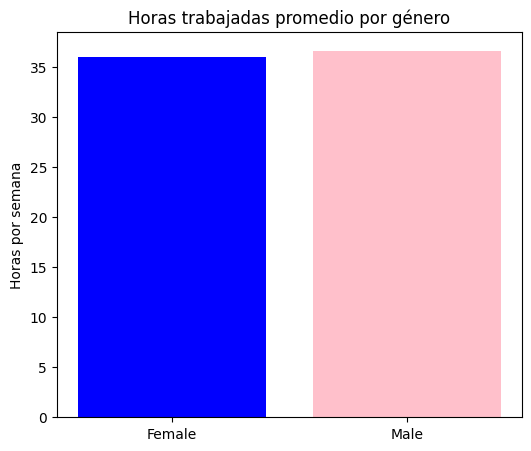

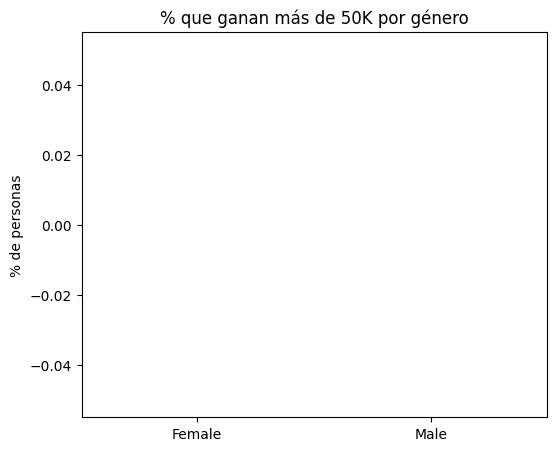

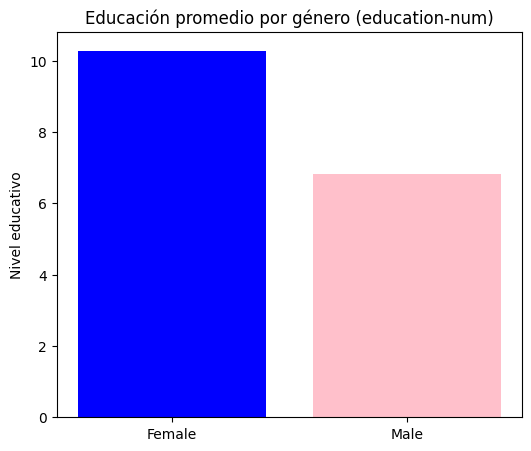

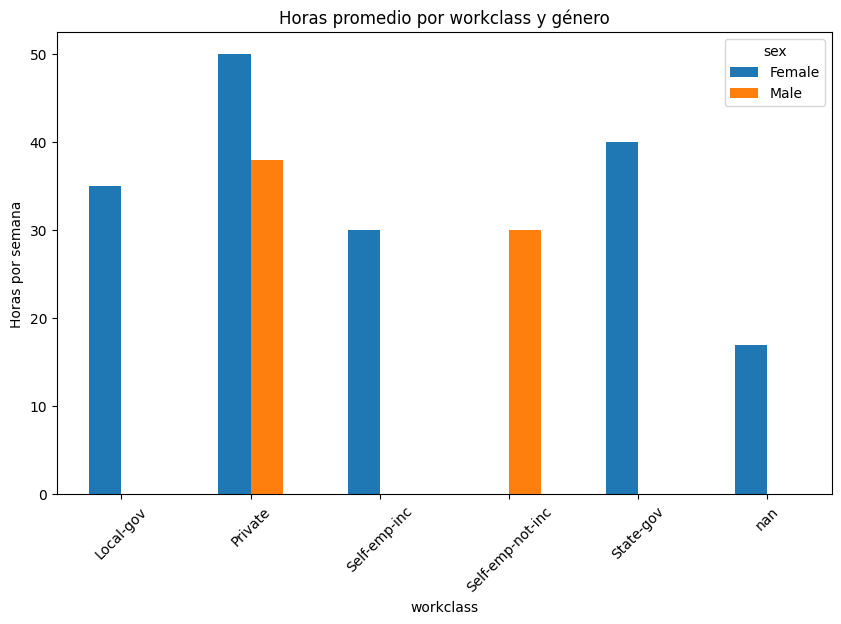

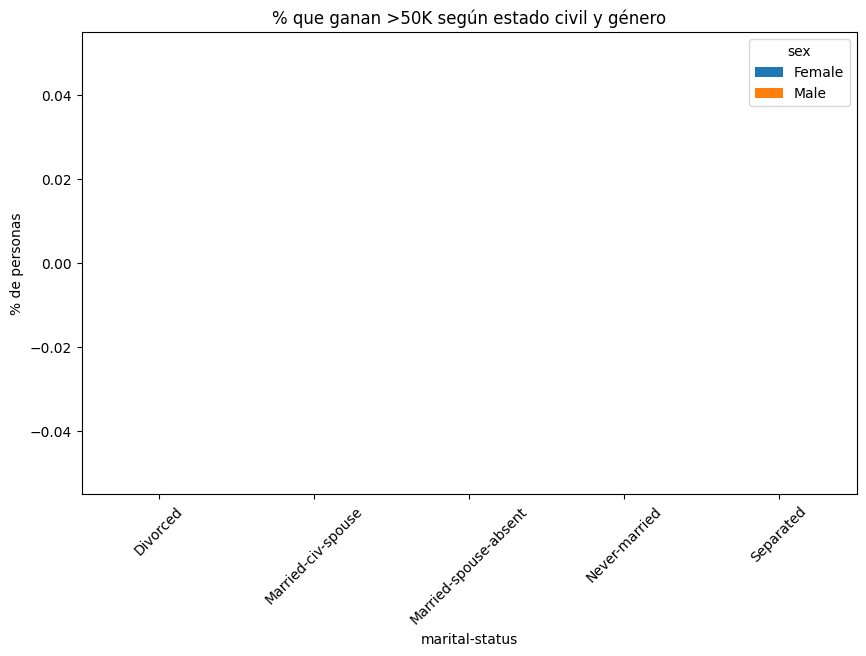

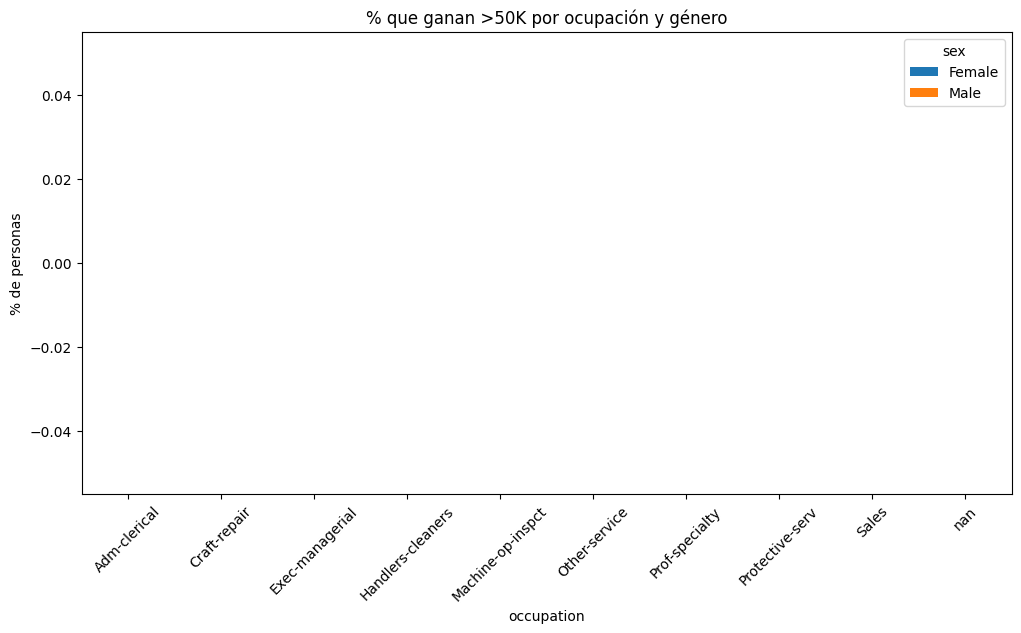

In [ ]:

# Cargar CSV
file_path = "/content/drive/MyDrive/Clases Virtuales/Carrera/Sostenibilidad/Proyecto 2/Datasets/income_dataset_ITU_project.csv"
df = pd.read_csv(file_path)


# Limpiar nombres de columnas y strings
df.columns = df.columns.str.strip()
for col in ["native-country", "sex", "marital-status", "workclass", "occupation"]:
    df[col] = df[col].astype(str).str.strip()

# Filtrar solo Honduras
df_honduras = df[df["native-country"] == "Honduras"].copy()

# Convertir columnas numéricas
df_honduras["hours-per-week"] = pd.to_numeric(df_honduras["hours-per-week"], errors="coerce")
df_honduras["education-num"] = pd.to_numeric(df_honduras["education-num"], errors="coerce")

# Convertir 'income >50K' a 0 y 1
df_honduras["income_50k"] = df_honduras["income >50K"].astype(str).apply(lambda x: 1 if ">50K" in x else 0)

# ----------------------------
# 1️⃣ Horas trabajadas promedio por género
avg_hours = df_honduras.groupby("sex")["hours-per-week"].mean().reset_index()
plt.figure(figsize=(6,5))
plt.bar(avg_hours["sex"], avg_hours["hours-per-week"], color=["blue","pink"])
plt.title("Horas trabajadas promedio por género")
plt.ylabel("Horas por semana")
plt.show()

# ----------------------------
# 2️⃣ % que ganan más de 50K por género
income_gender = df_honduras.groupby("sex")["income_50k"].mean().reset_index()
plt.figure(figsize=(6,5))
plt.bar(income_gender["sex"], income_gender["income_50k"]*100, color=["blue","pink"])
plt.title("% que ganan más de 50K por género")
plt.ylabel("% de personas")
plt.show()

# ----------------------------
# 3️⃣ Educación promedio por género
edu_gender = df_honduras.groupby("sex")["education-num"].mean().reset_index()
plt.figure(figsize=(6,5))
plt.bar(edu_gender["sex"], edu_gender["education-num"], color=["blue","pink"])
plt.title("Educación promedio por género (education-num)")
plt.ylabel("Nivel educativo")
plt.show()

# ----------------------------
# 4️⃣ Horas promedio por workclass y género
working_gender = df_honduras.groupby(["workclass","sex"])["hours-per-week"].mean().unstack()
working_gender.plot(kind="bar", figsize=(10,6))
plt.title("Horas promedio por workclass y género")
plt.ylabel("Horas por semana")
plt.xticks(rotation=45)
plt.show()

# ----------------------------
# 5️⃣ % que ganan >50K por estado civil y género
marital_income_gender = df_honduras.groupby(["marital-status","sex"])["income_50k"].mean().unstack()
marital_income_gender.plot(kind="bar", figsize=(10,6))
plt.title("% que ganan >50K según estado civil y género")
plt.ylabel("% de personas")
plt.xticks(rotation=45)
plt.show()

# ----------------------------
# 6️⃣ % que ganan >50K por ocupación y género
occupation_income_gender = df_honduras.groupby(["occupation","sex"])["income_50k"].mean().unstack()
occupation_income_gender.plot(kind="bar", figsize=(12,6))
plt.title("% que ganan >50K por ocupación y género")
plt.ylabel("% de personas")
plt.xticks(rotation=45)
plt.show()


# Tasa de Desempleo de Mujeres en Honduras

📊 Estadísticas descriptivas de desempleo femenino en Honduras:
count    34.000000
mean      6.357853
std       2.874486
min       2.934000
25%       4.138000
50%       5.429500
75%       8.293500
max      14.086000
Name: Unemployment_Female, dtype: float64


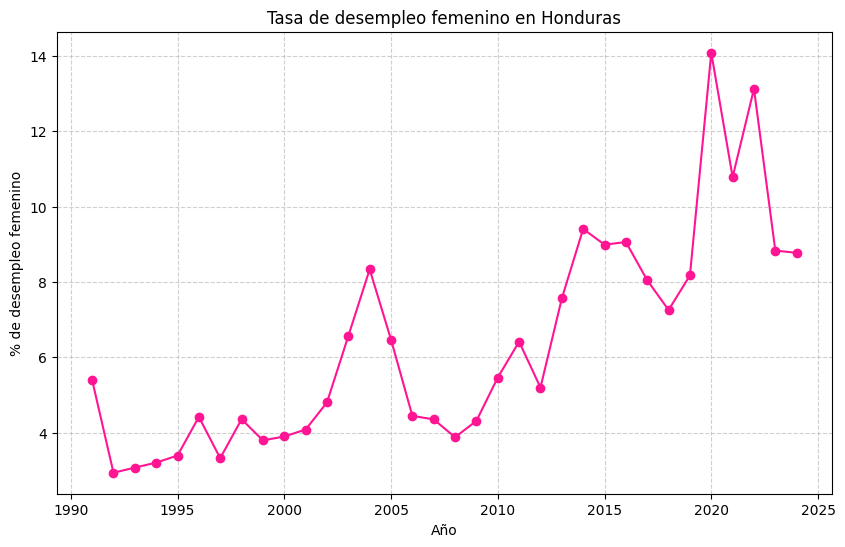

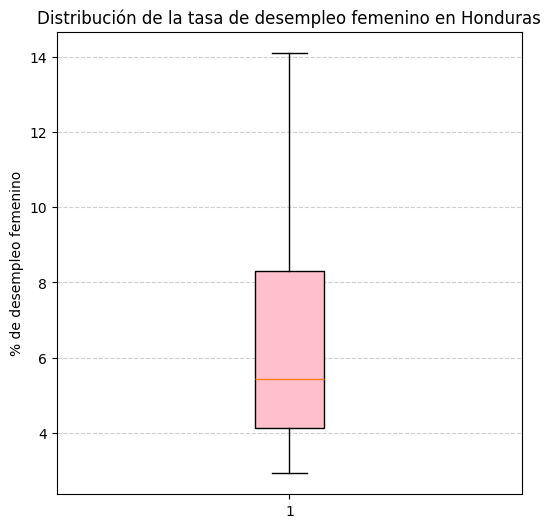

In [ ]:

# Ruta del archivo
file_path = "/content/drive/MyDrive/Clases Virtuales/Carrera/Sostenibilidad/Proyecto 2/Datasets/Unemployment_Female.csv"

# Leer dataset, columnas empiezan en fila 5
df = pd.read_csv(file_path, skiprows=4)

# Limpiar nombres de columnas
df.columns = df.columns.str.strip().str.replace("\ufeff", "")

# Filtrar solo Honduras
df_honduras = df[df["Country Name"] == "Honduras"].copy()

# Transformar columnas de años en filas
df_melt = df_honduras.melt(
    id_vars=["Country Name","Country Code","Indicator Name","Indicator Code"],
    var_name="Year",
    value_name="Unemployment_Female"
)

# Convertir 'Year' a numérico
df_melt["Year"] = pd.to_numeric(df_melt["Year"], errors="coerce")

# Eliminar filas vacías
df_melt = df_melt.dropna(subset=["Unemployment_Female"])

# Estadísticas básicas
print("📊 Estadísticas descriptivas de desempleo femenino en Honduras:")
print(df_melt["Unemployment_Female"].describe())

# ----------------------------
# Gráfico de línea
plt.figure(figsize=(10,6))
plt.plot(df_melt["Year"], df_melt["Unemployment_Female"], marker="o", color="deeppink")
plt.title("Tasa de desempleo femenino en Honduras")
plt.xlabel("Año")
plt.ylabel("% de desempleo femenino")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# ----------------------------
# Boxplot
plt.figure(figsize=(6,6))
plt.boxplot(df_melt["Unemployment_Female"], patch_artist=True, boxprops=dict(facecolor="pink"))
plt.title("Distribución de la tasa de desempleo femenino en Honduras")
plt.ylabel("% de desempleo femenino")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


# Tasa de Desempleo Hombres en Honduras

📊 Estadísticas descriptivas de desempleo masculino en Honduras:
count    34.000000
mean      4.212500
std       1.297366
min       2.672000
25%       3.202250
50%       4.040000
75%       4.630750
max       8.961000
Name: Unemployment_Male, dtype: float64


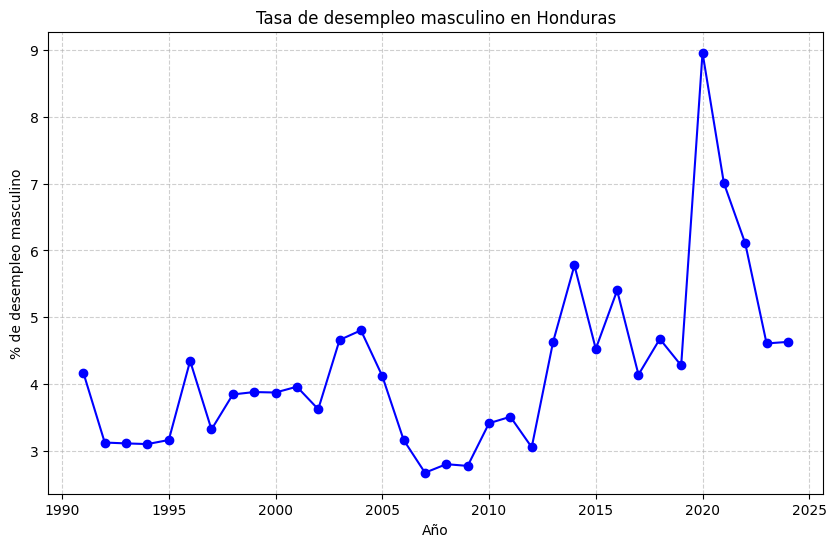

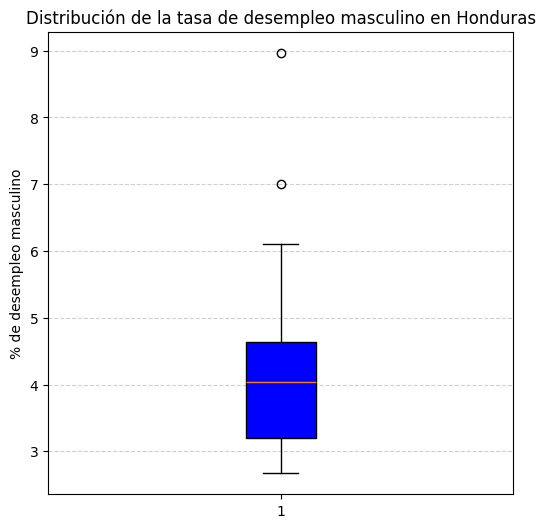

In [ ]:

# Ruta del archivo
file_path = "/content/drive/MyDrive/Clases Virtuales/Carrera/Sostenibilidad/Proyecto 2/Datasets/Unemployment_Male.csv"

# Leer dataset, columnas empiezan en fila 5
df = pd.read_csv(file_path, skiprows=4)

# Limpiar nombres de columnas
df.columns = df.columns.str.strip().str.replace("\ufeff", "")

# Filtrar solo Honduras
df_honduras = df[df["Country Name"] == "Honduras"].copy()

# Transformar columnas de años en filas
df_melt = df_honduras.melt(
    id_vars=["Country Name","Country Code","Indicator Name","Indicator Code"],
    var_name="Year",
    value_name="Unemployment_Male"
)

# Convertir 'Year' a numérico
df_melt["Year"] = pd.to_numeric(df_melt["Year"], errors="coerce")

# Eliminar filas vacías
df_melt = df_melt.dropna(subset=["Unemployment_Male"])

# Estadísticas básicas
print("📊 Estadísticas descriptivas de desempleo masculino en Honduras:")
print(df_melt["Unemployment_Male"].describe())

# ----------------------------
# Gráfico de línea
plt.figure(figsize=(10,6))
plt.plot(df_melt["Year"], df_melt["Unemployment_Male"], marker="o", color="blue")
plt.title("Tasa de desempleo masculino en Honduras")
plt.xlabel("Año")
plt.ylabel("% de desempleo masculino")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# ----------------------------
# Boxplot
plt.figure(figsize=(6,6))
plt.boxplot(df_melt["Unemployment_Male"], patch_artist=True, boxprops=dict(facecolor="blue"))
plt.title("Distribución de la tasa de desempleo masculino en Honduras")
plt.ylabel("% de desempleo masculino")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


# Tasa de Desempleo General en Honduras

📊 Estadísticas descriptivas de desempleo en Honduras:
count    34.000000
mean      4.977029
std       1.849428
min       3.060000
25%       3.619250
50%       4.422000
75%       5.917000
max      10.982000
Name: Unemployment_total, dtype: float64


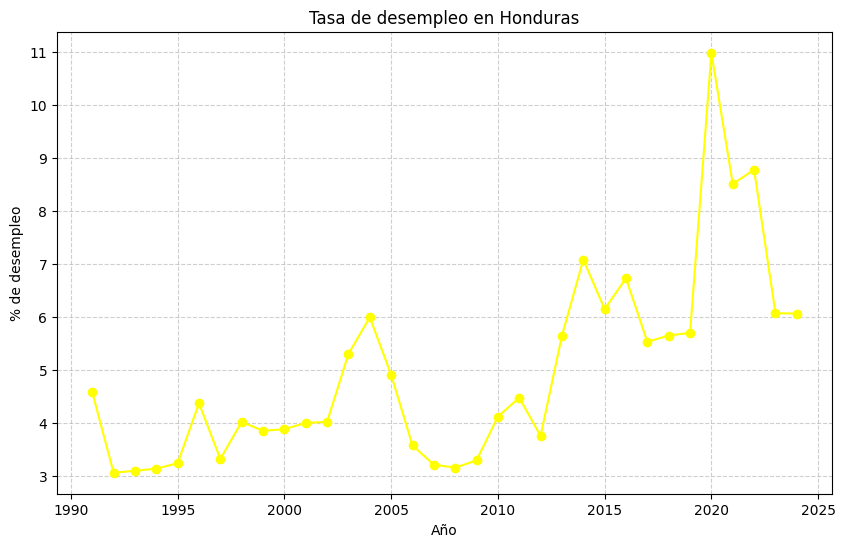

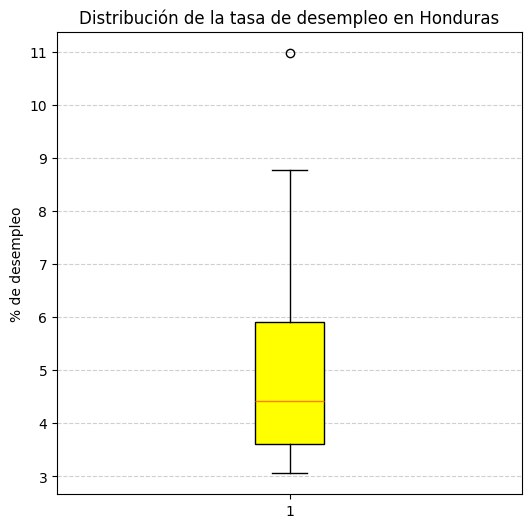

In [ ]:

# Ruta del archivo
file_path = "/content/drive/MyDrive/Clases Virtuales/Carrera/Sostenibilidad/Proyecto 2/Datasets/Unemployment_total.csv"

# Leer dataset, columnas empiezan en fila 5
df = pd.read_csv(file_path, skiprows=4)

# Limpiar nombres de columnas
df.columns = df.columns.str.strip().str.replace("\ufeff", "")

# Filtrar solo Honduras
df_honduras = df[df["Country Name"] == "Honduras"].copy()

# Transformar columnas de años en filas
df_melt = df_honduras.melt(
    id_vars=["Country Name","Country Code","Indicator Name","Indicator Code"],
    var_name="Year",
    value_name="Unemployment_total"
)

# Convertir 'Year' a numérico
df_melt["Year"] = pd.to_numeric(df_melt["Year"], errors="coerce")

# Eliminar filas vacías
df_melt = df_melt.dropna(subset=["Unemployment_total"])

# Estadísticas básicas
print("📊 Estadísticas descriptivas de desempleo en Honduras:")
print(df_melt["Unemployment_total"].describe())

# ----------------------------
# Gráfico de línea
plt.figure(figsize=(10,6))
plt.plot(df_melt["Year"], df_melt["Unemployment_total"], marker="o", color="yellow")
plt.title("Tasa de desempleo en Honduras")
plt.xlabel("Año")
plt.ylabel("% de desempleo")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# ----------------------------
# Boxplot
plt.figure(figsize=(6,6))
plt.boxplot(df_melt["Unemployment_total"], patch_artist=True, boxprops=dict(facecolor="yellow"))
plt.title("Distribución de la tasa de desempleo en Honduras")
plt.ylabel("% de desempleo")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# Tasa de Desempleo con Educacion Basica

📊 Estadísticas descriptivas de desempleo en Honduras en personas con educacion basica:
count    18.000000
mean      5.389611
std       1.795061
min       3.467000
25%       3.849500
50%       5.299000
75%       6.004750
max       9.412000
Name: Unemployment_BasicEducation, dtype: float64


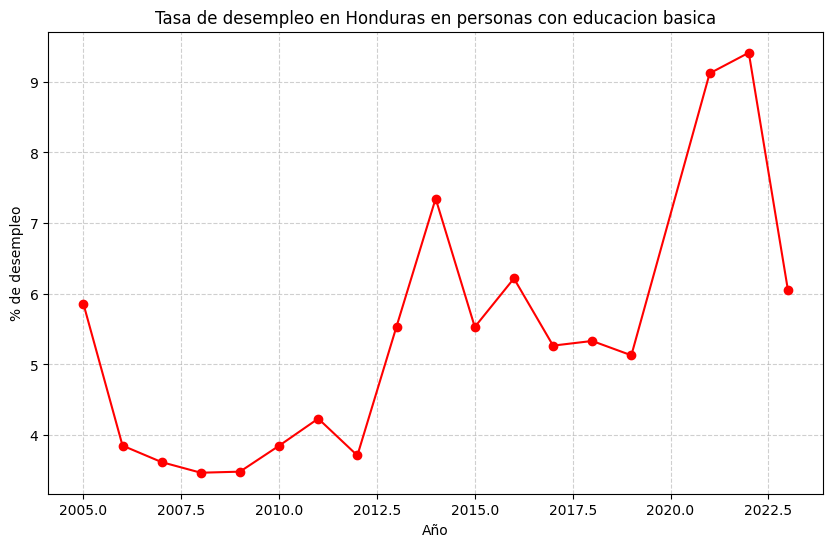

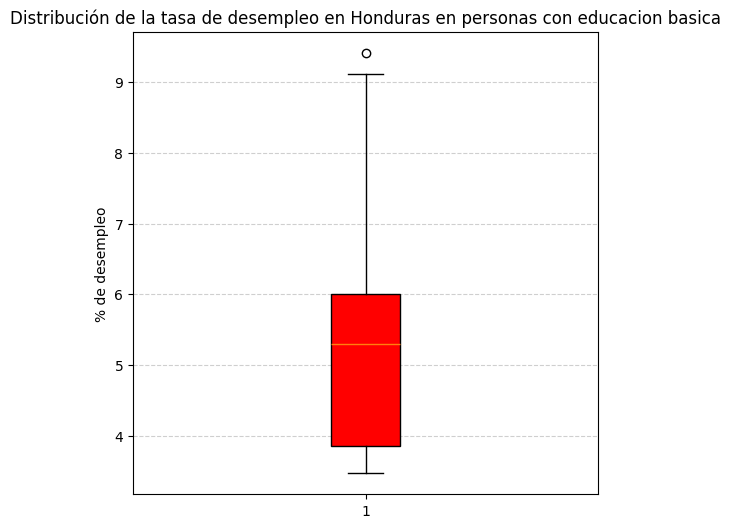

In [ ]:

# Ruta del archivo
file_path = "/content/drive/MyDrive/Clases Virtuales/Carrera/Sostenibilidad/Proyecto 2/Datasets/Unemployment_BasicEducation.csv"

# Leer dataset, columnas empiezan en fila 5
df = pd.read_csv(file_path, skiprows=4)

# Limpiar nombres de columnas
df.columns = df.columns.str.strip().str.replace("\ufeff", "")

# Filtrar solo Honduras
df_honduras = df[df["Country Name"] == "Honduras"].copy()

# Transformar columnas de años en filas
df_melt = df_honduras.melt(
    id_vars=["Country Name","Country Code","Indicator Name","Indicator Code"],
    var_name="Year",
    value_name="Unemployment_BasicEducation"
)

# Convertir 'Year' a numérico
df_melt["Year"] = pd.to_numeric(df_melt["Year"], errors="coerce")

# Eliminar filas vacías
df_melt = df_melt.dropna(subset=["Unemployment_BasicEducation"])

# Estadísticas básicas
print("📊 Estadísticas descriptivas de desempleo en Honduras en personas con educacion basica:")
print(df_melt["Unemployment_BasicEducation"].describe())

# ----------------------------
# Gráfico de línea
plt.figure(figsize=(10,6))
plt.plot(df_melt["Year"], df_melt["Unemployment_BasicEducation"], marker="o", color="red")
plt.title("Tasa de desempleo en Honduras en personas con educacion basica")
plt.xlabel("Año")
plt.ylabel("% de desempleo")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# ----------------------------
# Boxplot
plt.figure(figsize=(6,6))
plt.boxplot(df_melt["Unemployment_BasicEducation"], patch_artist=True, boxprops=dict(facecolor="red"))
plt.title("Distribución de la tasa de desempleo en Honduras en personas con educacion basica")
plt.ylabel("% de desempleo")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# Tasa de Desempleo con Educacion Avanzada

📊 Estadísticas descriptivas de desempleo en Honduras en personas con educacion avanzada:
count    17.000000
mean      6.185412
std       1.765909
min       3.644000
25%       4.765000
50%       6.021000
75%       7.576000
max       8.947000
Name: Unemployment_AdvancedEducation, dtype: float64


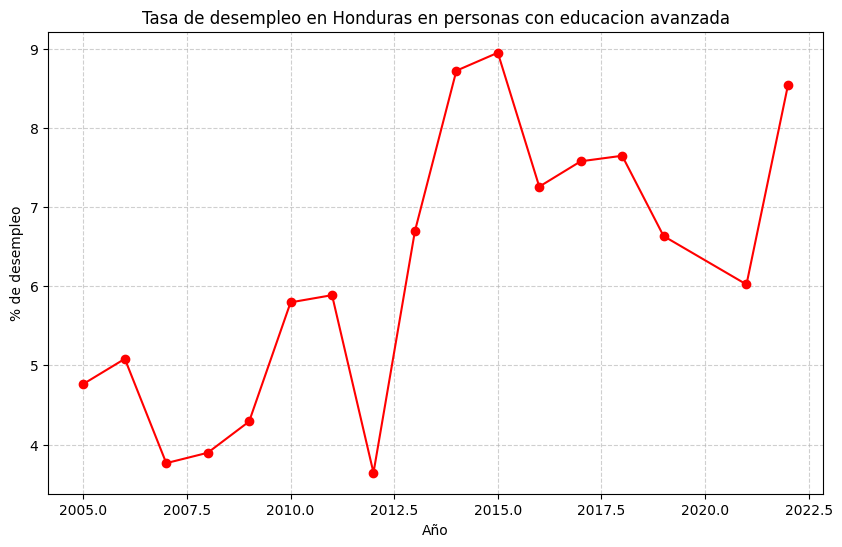

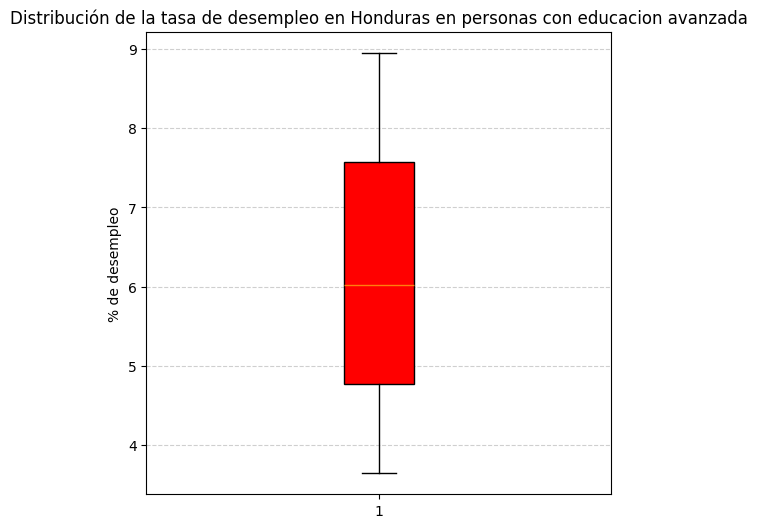

In [ ]:

# Ruta del archivo
file_path = "/content/drive/MyDrive/Clases Virtuales/Carrera/Sostenibilidad/Proyecto 2/Datasets/Unemployment_AdvancedEducation.csv"

# Leer dataset, columnas empiezan en fila 5
df = pd.read_csv(file_path, skiprows=4)

# Limpiar nombres de columnas
df.columns = df.columns.str.strip().str.replace("\ufeff", "")

# Filtrar solo Honduras
df_honduras = df[df["Country Name"] == "Honduras"].copy()

# Transformar columnas de años en filas
df_melt = df_honduras.melt(
    id_vars=["Country Name","Country Code","Indicator Name","Indicator Code"],
    var_name="Year",
    value_name="Unemployment_AdvancedEducation"
)

# Convertir 'Year' a numérico
df_melt["Year"] = pd.to_numeric(df_melt["Year"], errors="coerce")

# Eliminar filas vacías
df_melt = df_melt.dropna(subset=["Unemployment_AdvancedEducation"])

# Estadísticas básicas
print("📊 Estadísticas descriptivas de desempleo en Honduras en personas con educacion avanzada:")
print(df_melt["Unemployment_AdvancedEducation"].describe())

# ----------------------------
# Gráfico de línea
plt.figure(figsize=(10,6))
plt.plot(df_melt["Year"], df_melt["Unemployment_AdvancedEducation"], marker="o", color="red")
plt.title("Tasa de desempleo en Honduras en personas con educacion avanzada")
plt.xlabel("Año")
plt.ylabel("% de desempleo")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# ----------------------------
# Boxplot
plt.figure(figsize=(6,6))
plt.boxplot(df_melt["Unemployment_AdvancedEducation"], patch_artist=True, boxprops=dict(facecolor="red"))
plt.title("Distribución de la tasa de desempleo en Honduras en personas con educacion avanzada")
plt.ylabel("% de desempleo")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# Relación empleo-población

📊 Estadísticas descriptivas de desempleo en Honduras en la relacion empleo-poblacion:
count    34.000000
mean     59.861971
std       3.034539
min      53.665000
25%      57.864500
50%      59.523500
75%      62.889750
max      63.885000
Name: Employment_to_population_ratio, dtype: float64


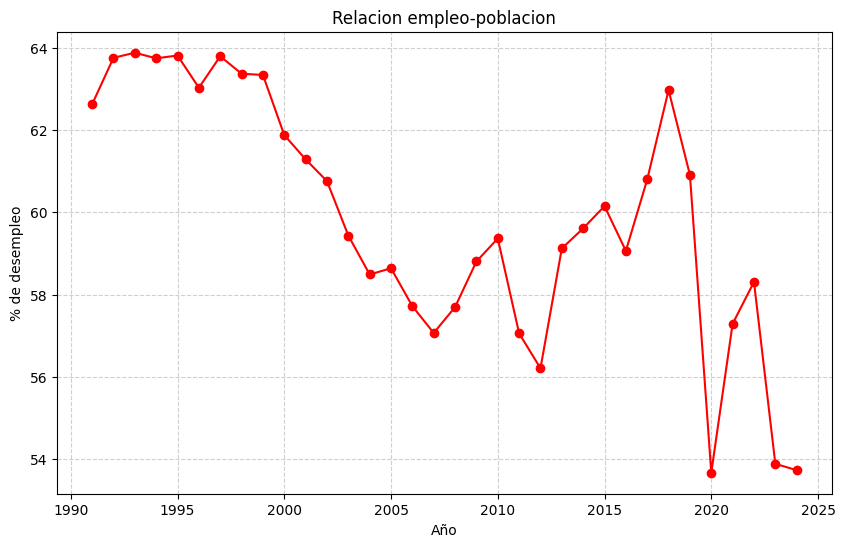

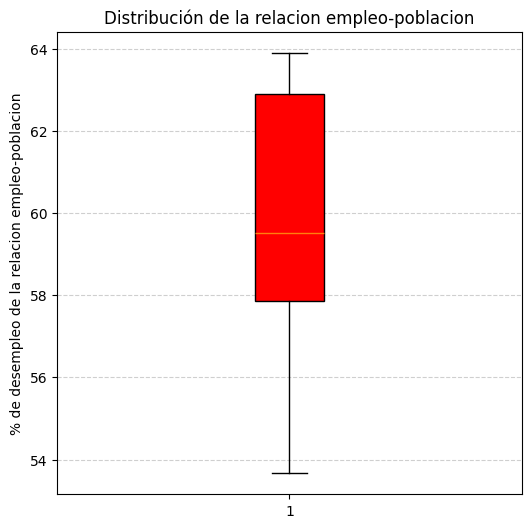

In [ ]:

# Ruta del archivo
file_path = "/content/drive/MyDrive/Clases Virtuales/Carrera/Sostenibilidad/Proyecto 2/Datasets/Employment_to_population_ratio.csv"

# Leer dataset, columnas empiezan en fila 5
df = pd.read_csv(file_path, skiprows=4)

# Limpiar nombres de columnas
df.columns = df.columns.str.strip().str.replace("\ufeff", "")

# Filtrar solo Honduras
df_honduras = df[df["Country Name"] == "Honduras"].copy()

# Transformar columnas de años en filas
df_melt = df_honduras.melt(
    id_vars=["Country Name","Country Code","Indicator Name","Indicator Code"],
    var_name="Year",
    value_name="Employment_to_population_ratio"
)

# Convertir 'Year' a numérico
df_melt["Year"] = pd.to_numeric(df_melt["Year"], errors="coerce")

# Eliminar filas vacías
df_melt = df_melt.dropna(subset=["Employment_to_population_ratio"])

# Estadísticas básicas
print("📊 Estadísticas descriptivas de desempleo en Honduras en la relacion empleo-poblacion:")
print(df_melt["Employment_to_population_ratio"].describe())

# ----------------------------
# Gráfico de línea
plt.figure(figsize=(10,6))
plt.plot(df_melt["Year"], df_melt["Employment_to_population_ratio"], marker="o", color="red")
plt.title("Relacion empleo-poblacion")
plt.xlabel("Año")
plt.ylabel("% de desempleo")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# ----------------------------
# Boxplot
plt.figure(figsize=(6,6))
plt.boxplot(df_melt["Employment_to_population_ratio"], patch_artist=True, boxprops=dict(facecolor="red"))
plt.title("Distribución de la relacion empleo-poblacion")
plt.ylabel("% de desempleo de la relacion empleo-poblacion")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# Formación de capital bruto
Un fondo bruto de capital, más precisamente llamado formación bruta de capital (FBC), es un indicador macroeconómico que mide la inversión total realizada en una economía durante un período, abarcando la adición de activos fijos (como maquinaria y edificios), el cambio neto en el valor de los inventarios (como bienes no vendidos) y las adquisiciones netas de objetos de valor (como oro y arte). Representa el gasto total en activos que se espera que produzcan producción a lo largo del tiempo, contribuyendo a la riqueza nacional.


📊 Estadísticas descriptivas de la formacion de capital bruto:
count    6.500000e+01
mean     2.166091e+09
std      2.276300e+09
min      4.340000e+07
25%      2.710000e+08
50%      1.176540e+09
75%      3.465623e+09
max      8.343209e+09
Name: Gross_capital_formation, dtype: float64


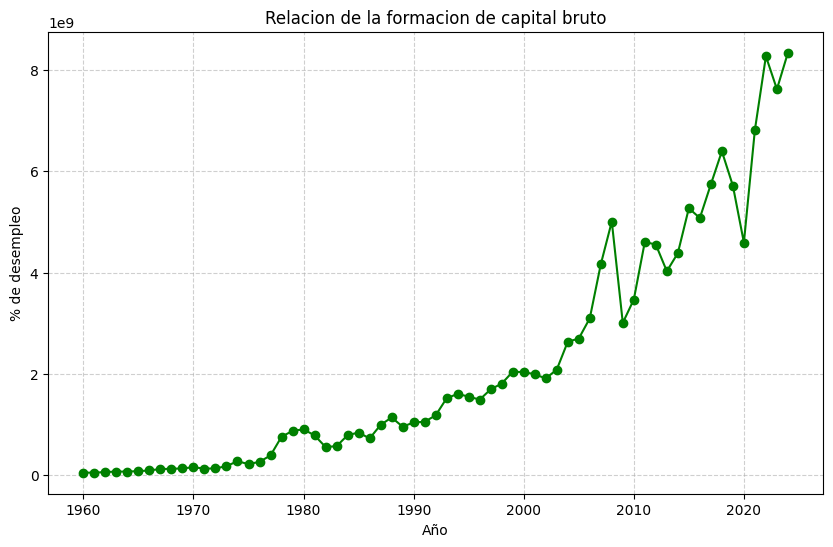

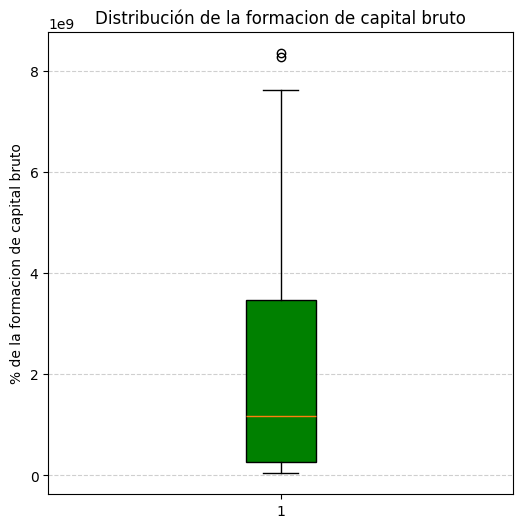

In [ ]:

# Ruta del archivo
file_path = "/content/drive/MyDrive/Clases Virtuales/Carrera/Sostenibilidad/Proyecto 2/Datasets/Gross_capital_formation.csv"

# Leer dataset, columnas empiezan en fila 5
df = pd.read_csv(file_path, skiprows=4)

# Limpiar nombres de columnas
df.columns = df.columns.str.strip().str.replace("\ufeff", "")

# Filtrar solo Honduras
df_honduras = df[df["Country Name"] == "Honduras"].copy()

# Transformar columnas de años en filas
df_melt = df_honduras.melt(
    id_vars=["Country Name","Country Code","Indicator Name","Indicator Code"],
    var_name="Year",
    value_name="Gross_capital_formation"
)

# Convertir 'Year' a numérico
df_melt["Year"] = pd.to_numeric(df_melt["Year"], errors="coerce")

# Eliminar filas vacías
df_melt = df_melt.dropna(subset=["Gross_capital_formation"])

# Estadísticas básicas
print("📊 Estadísticas descriptivas de la formacion de capital bruto:")
print(df_melt["Gross_capital_formation"].describe())

# ----------------------------
# Gráfico de línea
plt.figure(figsize=(10,6))
plt.plot(df_melt["Year"], df_melt["Gross_capital_formation"], marker="o", color="green")
plt.title("Relacion de la formacion de capital bruto")
plt.xlabel("Año")
plt.ylabel("% de desempleo")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# ----------------------------
# Boxplot
plt.figure(figsize=(6,6))
plt.boxplot(df_melt["Gross_capital_formation"], patch_artist=True, boxprops=dict(facecolor="green"))
plt.title("Distribución de la formacion de capital bruto")
plt.ylabel("% de la formacion de capital bruto")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# Crecimiento anual del producto interno bruto

📊 Estadísticas descriptivas de la formacion de producto interno bruto:
count    64.000000
mean      3.903163
std       3.426982
min      -8.965082
25%       2.682304
50%       3.943988
75%       5.995807
max      12.565284
Name: GPD_GrowthAnual, dtype: float64


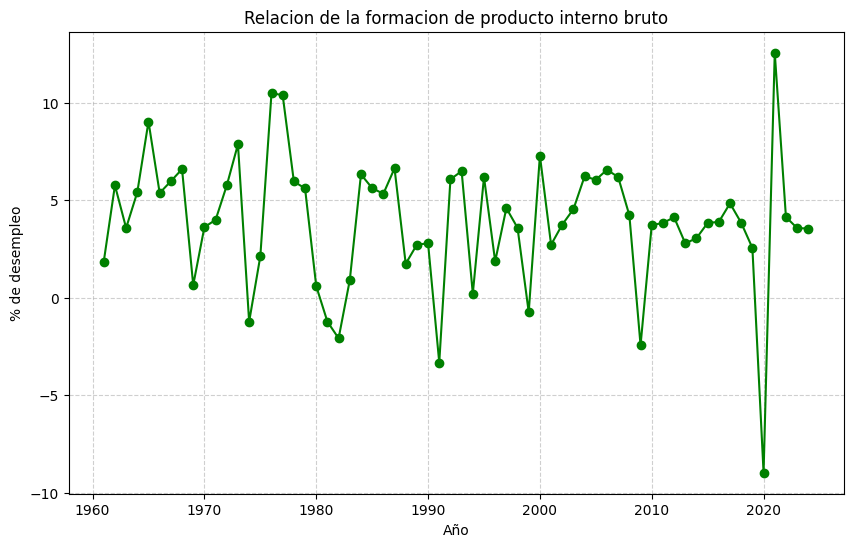

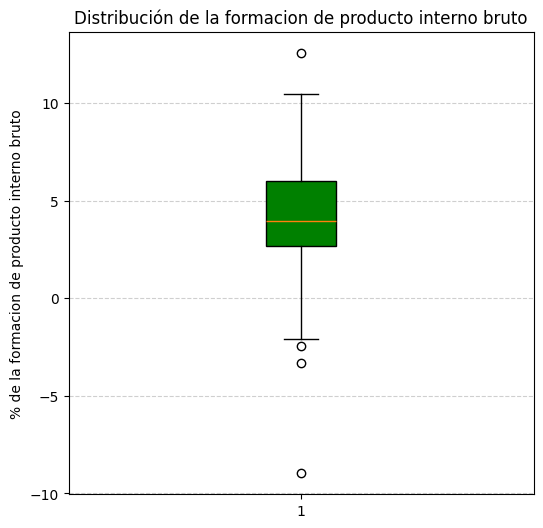

In [ ]:
# Ruta del archivo
file_path = "/content/drive/MyDrive/Clases Virtuales/Carrera/Sostenibilidad/Proyecto 2/Datasets/GPD_GrowthAnual.csv"

# Leer dataset, columnas empiezan en fila 5
df = pd.read_csv(file_path, skiprows=4)

# Limpiar nombres de columnas
df.columns = df.columns.str.strip().str.replace("\ufeff", "")

# Filtrar solo Honduras
df_honduras = df[df["Country Name"] == "Honduras"].copy()

# Transformar columnas de años en filas
df_melt = df_honduras.melt(
    id_vars=["Country Name","Country Code","Indicator Name","Indicator Code"],
    var_name="Year",
    value_name="GPD_GrowthAnual"
)

# Convertir 'Year' a numérico
df_melt["Year"] = pd.to_numeric(df_melt["Year"], errors="coerce")

# Eliminar filas vacías
df_melt = df_melt.dropna(subset=["GPD_GrowthAnual"])

# Estadísticas básicas
print("📊 Estadísticas descriptivas de la formacion de producto interno bruto:")
print(df_melt["GPD_GrowthAnual"].describe())

# ----------------------------
# Gráfico de línea
plt.figure(figsize=(10,6))
plt.plot(df_melt["Year"], df_melt["GPD_GrowthAnual"], marker="o", color="green")
plt.title("Relacion de la formacion de producto interno bruto")
plt.xlabel("Año")
plt.ylabel("% de desempleo")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# ----------------------------
# Boxplot
plt.figure(figsize=(6,6))
plt.boxplot(df_melt["GPD_GrowthAnual"], patch_artist=True, boxprops=dict(facecolor="green"))
plt.title("Distribución de la formacion de producto interno bruto")
plt.ylabel("% de la formacion de producto interno bruto")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# Tasa de Feminicidios en Honduras

📊 Estadísticas descriptivas de femicidios en Honduras:
count     14.000000
mean     272.071429
std       61.882599
min      175.000000
25%      228.750000
50%      277.000000
75%      307.750000
max      408.000000
Name: Número de femicidios o feminicidios, dtype: float64


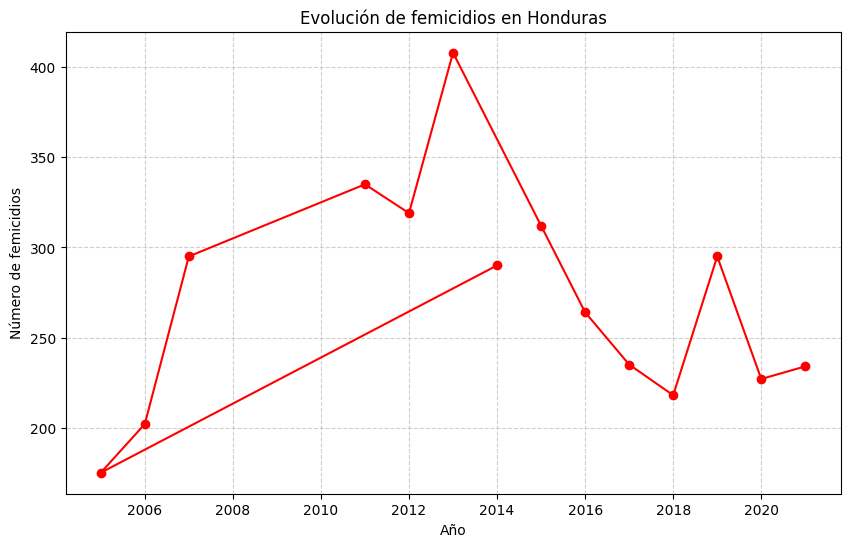

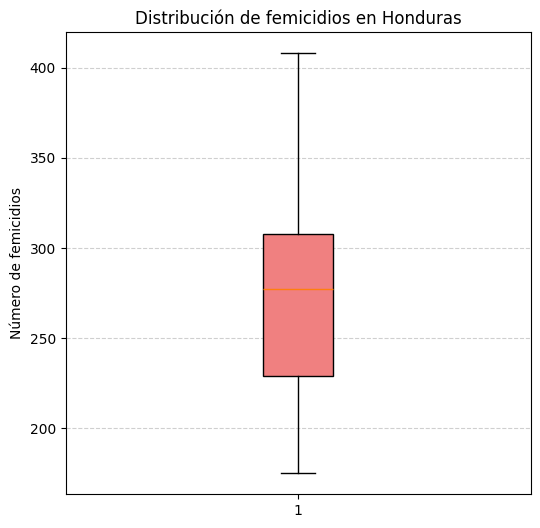

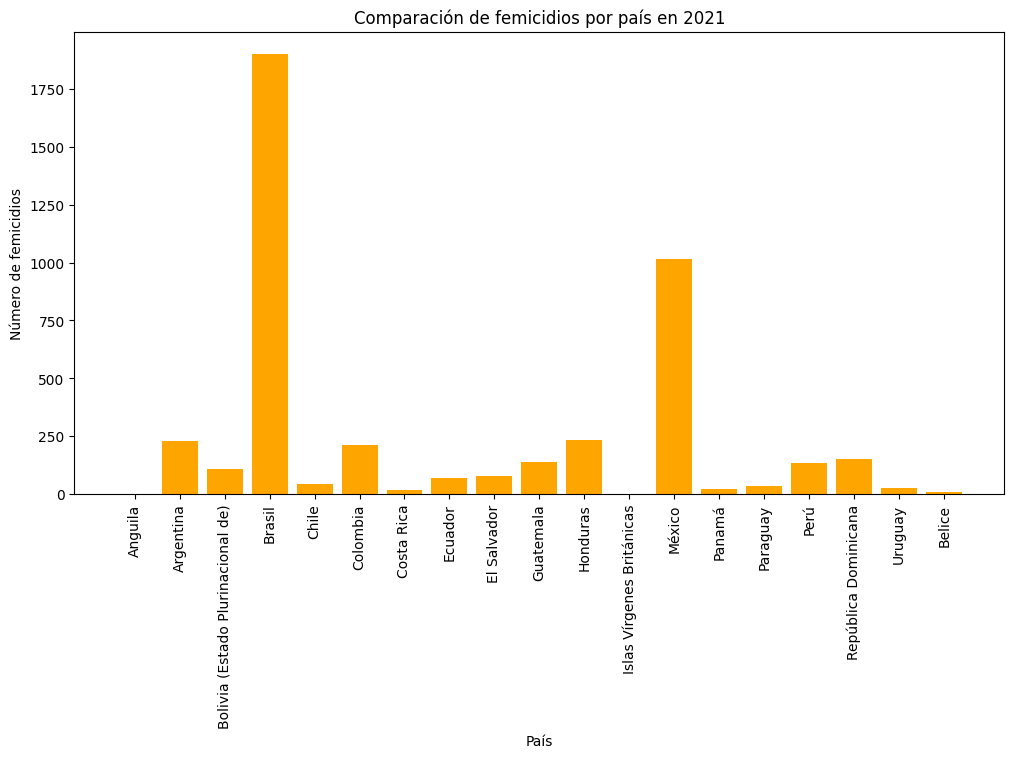

In [ ]:

file_path = "/content/drive/MyDrive/Clases Virtuales/Carrera/Sostenibilidad/Proyecto 2/Datasets/CEPAL_statistics_feminicidios_20230627_copy.xlsx"
df = pd.read_excel(file_path)

# Limpiar nombres de columnas
df.columns = df.columns.str.strip().str.replace("\ufeff", "")

# Asegurar que el número de femicidios sea numérico
df["Número de femicidios o feminicidios"] = pd.to_numeric(df["Número de femicidios o feminicidios"], errors="coerce")

# ----------------------------
# Filtrar Honduras
df_honduras = df[df["País__ESTANDAR"] == "Honduras"].copy()

# Estadísticas básicas
print("📊 Estadísticas descriptivas de femicidios en Honduras:")
print(df_honduras["Número de femicidios o feminicidios"].describe())

# ----------------------------
# Gráfico de línea (evolución en el tiempo)
plt.figure(figsize=(10,6))
plt.plot(df_honduras["Años__ESTANDAR"], df_honduras["Número de femicidios o feminicidios"], marker="o", color="red")
plt.title("Evolución de femicidios en Honduras")
plt.xlabel("Año")
plt.ylabel("Número de femicidios")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# ----------------------------
# Boxplot (distribución)
plt.figure(figsize=(6,6))
plt.boxplot(df_honduras["Número de femicidios o feminicidios"], patch_artist=True, boxprops=dict(facecolor="lightcoral"))
plt.title("Distribución de femicidios en Honduras")
plt.ylabel("Número de femicidios")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# ----------------------------
# Comparación entre países en un año específico (ejemplo: el más reciente)
ultimo_anio = df["Años__ESTANDAR"].max()
df_ultimo = df[df["Años__ESTANDAR"] == ultimo_anio]

plt.figure(figsize=(12,6))
plt.bar(df_ultimo["País__ESTANDAR"], df_ultimo["Número de femicidios o feminicidios"], color="orange")
plt.title(f"Comparación de femicidios por país en {ultimo_anio}")
plt.xlabel("País")
plt.ylabel("Número de femicidios")
plt.xticks(rotation=90)
plt.show()

# Nivel de Educacion por Departamento a nivel pre-basica

Totales generales:
 {'2021_Femenino': np.float64(199488.0), '2021_Masculino': np.float64(202336.0), '2022_Femenino': np.float64(205686.0), '2022_Masculino': np.float64(206740.0)}


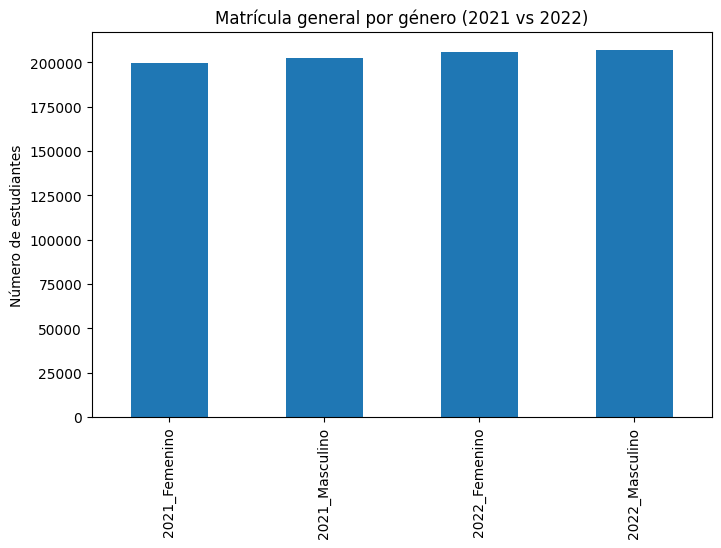

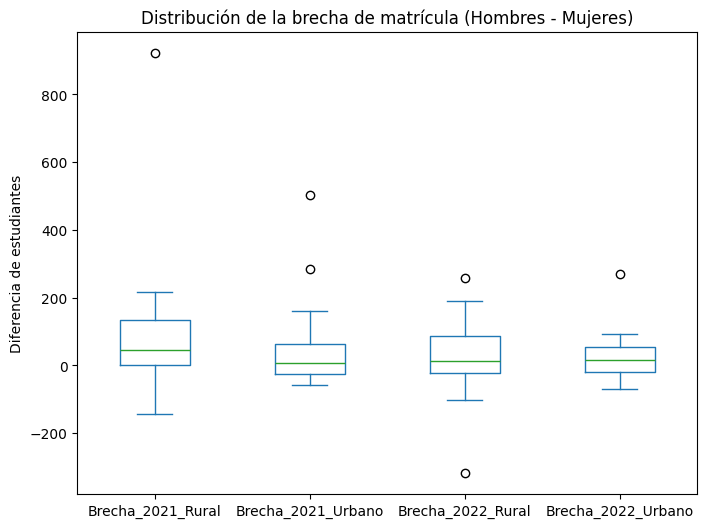


Departamentos con mayor brecha de género en 2022:
      DEPARTAMENTO  Brecha_2022_Rural  Brecha_2022_Urbano
19        TOTALES              258.0               269.0
13        LEMPIRA              191.0                37.0
16  SANTA BÁRBARA              158.0                37.0
5          CORTÉS              140.0                94.0
12         LA PAZ               89.0                51.0


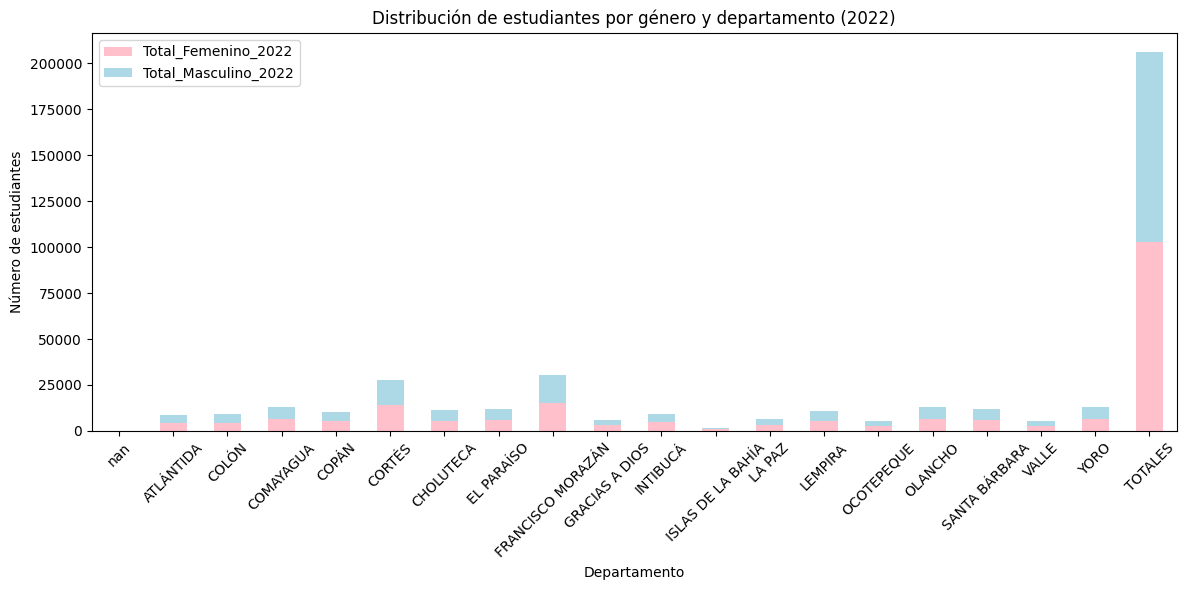

In [ ]:

file_path = "/content/drive/MyDrive/Clases Virtuales/Carrera/Sostenibilidad/Proyecto 2/Datasets/4.2.2.xls"
df = pd.read_excel(file_path, header=1)

# --- Renombrar columnas ---
df.columns = [
    "DEPARTAMENTO",
    "2021_Rural_Femenino", "2021_Rural_Masculino", "2021_Rural_Total",
    "2021_Urbano_Femenino", "2021_Urbano_Masculino", "2021_Urbano_Total",
    "2022_Rural_Femenino", "2022_Rural_Masculino", "2022_Rural_Total",
    "2022_Urbano_Femenino", "2022_Urbano_Masculino", "2022_Urbano_Total"
]

# --- Filtrar filas que no son departamentos ---
df = df[~df["DEPARTAMENTO"].astype(str).str.startswith("Fuente")]

# --- Convertir todas las columnas numéricas a número ---
cols_numericas = df.columns.drop("DEPARTAMENTO")
df[cols_numericas] = df[cols_numericas].apply(pd.to_numeric, errors="coerce")

# --- Desigualdad general ---
totales_genero = {
    "2021_Femenino": df["2021_Rural_Femenino"].sum() + df["2021_Urbano_Femenino"].sum(),
    "2021_Masculino": df["2021_Rural_Masculino"].sum() + df["2021_Urbano_Masculino"].sum(),
    "2022_Femenino": df["2022_Rural_Femenino"].sum() + df["2022_Urbano_Femenino"].sum(),
    "2022_Masculino": df["2022_Rural_Masculino"].sum() + df["2022_Urbano_Masculino"].sum(),
}
print("Totales generales:\n", totales_genero)

# Gráfico barras generales
pd.DataFrame([totales_genero]).T.plot(kind="bar", figsize=(8,5), legend=False)
plt.title("Matrícula general por género (2021 vs 2022)")
plt.ylabel("Número de estudiantes")
plt.show()

# --- Desigualdad regional ---
df["Brecha_2021_Rural"] = df["2021_Rural_Masculino"] - df["2021_Rural_Femenino"]
df["Brecha_2021_Urbano"] = df["2021_Urbano_Masculino"] - df["2021_Urbano_Femenino"]
df["Brecha_2022_Rural"] = df["2022_Rural_Masculino"] - df["2022_Rural_Femenino"]
df["Brecha_2022_Urbano"] = df["2022_Urbano_Masculino"] - df["2022_Urbano_Femenino"]

# Boxplot para ver desigualdad por departamento
df[["Brecha_2021_Rural","Brecha_2021_Urbano","Brecha_2022_Rural","Brecha_2022_Urbano"]].plot(kind="box", figsize=(8,6))
plt.title("Distribución de la brecha de matrícula (Hombres - Mujeres)")
plt.ylabel("Diferencia de estudiantes")
plt.show()

# --- Ranking departamentos con mayor brecha 2022 ---
ranking = df[["DEPARTAMENTO","Brecha_2022_Rural","Brecha_2022_Urbano"]]
print("\nDepartamentos con mayor brecha de género en 2022:\n", ranking.sort_values(by="Brecha_2022_Rural", ascending=False).head())

# --- Distribución de hombres y mujeres por departamento (2022) ---
df["Total_Femenino_2022"] = df["2022_Rural_Femenino"] + df["2022_Urbano_Femenino"]
df["Total_Masculino_2022"] = df["2022_Rural_Masculino"] + df["2022_Urbano_Masculino"]

df[["DEPARTAMENTO","Total_Femenino_2022","Total_Masculino_2022"]].set_index("DEPARTAMENTO").plot(
    kind="bar", stacked=True, figsize=(12,6), color=["pink","lightblue"]
)
plt.title("Distribución de estudiantes por género y departamento (2022)")
plt.ylabel("Número de estudiantes")
plt.xlabel("Departamento")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
